# MOVIE MARKET ANALYTICS 
 **SEEKING INSIGHTS FOR NEW FILM STUDIO**

*GROUP 4-B*

*DSF-FT12-HYBRID*

*TECHNICAL MENTOR : SAMUEL KARU*

## INTRODUCTION

In the rapidly growing world of cinema,there has been an noticeable rise in the originality and creativity of films as seen amongst the leading movie production studios.Recognizing this trend,our company developed a profound interest in entering the film industry.However,succeeding in this highly competitive space does not only require creative ambition but demands data-driven insights to identify the most profitable and successful genres in the industry to persue. 

## BUSINESS UNDERSTANDING

Our company is intrested in venturing into the film industry.The key business problem we want to find the solution to is **determining what types of films are most likely to succeed at the box office**.To do this we have come up with clear objectives that will be a guide to this project to solve the problem at hand. 

The primary objectives are as follows:
1. **Analyze different genre performance based on ratings and votes** to determine and understand what types of movies have historically performed well at the box office.

2. **Examine the influence of directors on movie ratings**.By identifying succesfull directors whose styles or approaches may inspire the new studio's productions.

3. **Uncover key patterns and actionable trends in films success over time**. By comparing release years of films alongside rating data to uncover patterns of diferent genres over the years.

4. **Recommend concrete strategies the business should take in order for them to succeed in the industry**. These recommendation will be based on the insights got after analysing the data we have.


## DATA PREPROCESSING

The data used for this project is sourced from multiple platforms which are: **Internet Movie Database(IMDb)** , 
**Box offic Mojo** , **Rotten Tomatoes** , **TheMovieDB** and **The Numbers**. A thorough Exploratory Data Analysis(EDA) will be performed with a focus on  data from **IMdb**, **Rotten Tomatoes**,**Box office Mojo** and **ThemovieDB**.
As part of the data preprocessing process, we will:

> Clean the data by handling missing values and correcting inconsistencies(Duplicates e.t.c)

> Merge relevant datasets to create a unified dataset that can be analysed easily.
 
> Explore relationships between movie attributes and success metrics through visualizations and descriptive statistics

Through insightful visualizations and statistical exploration, we aim to uncover key patterns and trends that will inform the final business recommendations and help achieve the above stated project objectives.

## DATA PREPARATION(BOX OFFICE MOJO/THE NUMBERS)

## 【1】*Data Exploration*  

In [75]:
# Import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [76]:
# Load the dataset
Gross_df = pd.read_csv('./Data/bom.movie_gross.csv.gz', compression='gzip')
Gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [77]:
# Load the dataset
Number_df = pd.read_csv("./Data/tn.movie_budgets.csv.gz", compression='gzip')
Number_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## 【2】*Data Cleaning* 

> BOX OFFICE MOJO

In [78]:
# Check info
Gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [79]:
# Check shape of the dataset
Gross_df.shape

(3387, 5)

In [80]:
# check for number of missing values
Gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [81]:
# Drop rows with missing values 
Gross_df = Gross_df.dropna(subset=['studio' , 'domestic_gross' , 'foreign_gross'])

In [82]:
# Check for missing values again
Gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [83]:
# Check info
Gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [84]:
# Check for dupicated values
Gross_df.duplicated().sum()

0

In [85]:
# Check the shape
Gross_df.shape

(2007, 5)

In [86]:
# Replacing missing or dash values with NaN, and remove commas
for col in ['domestic_gross', 'foreign_gross']:
    Gross_df[col] = Gross_df[col].astype(str)  # Convert to string first
    Gross_df[col] = Gross_df[col].replace({'—': None, '': None})
    Gross_df[col] = Gross_df[col].str.replace(',', '', regex=False)
    Gross_df[col] = pd.to_numeric(Gross_df[col], errors='coerce')  # Final conversion to numbers

In [87]:
# Save cleaned version of dataset
Gross_df.to_csv('Cleaned_bom.movie_gross.csv')

### *Data exploration and cleaning conclusion(BOM)*

> Data shape was initially, (3387, 5), However after cleaning and removal of missing values the data shape changes to,(2007, 5),There were no duplicated values,there the data can proceed to analysis and visualizations.

> THE NUMBERS

In [88]:
# Check info
Number_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [89]:
# check shape
Number_df.shape

(5782, 6)

In [90]:
# Check for Duplicates
Number_df.duplicated().sum()

0

In [91]:
# Save the data
Number_df.to_csv('Cleaned_tn_movie_budgets.csv')

### *Data exploration and cleaning conclusion(The Numbers)*

> The data from The numbers dataset is in quite mint condition with no missing values or Duplicated values, it has a shape of (5782, 6),showcasing rows and columns respectively.

## 【3】*Data Analysis and Visualization* 

> 1.TOP PERFORMING STUDIOS(OUR COMPETITORS)

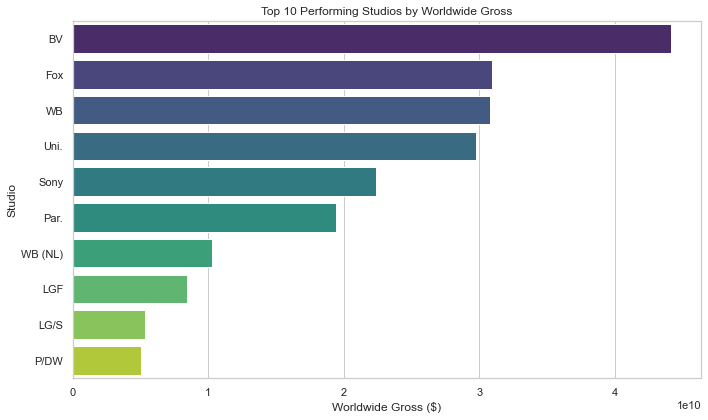

In [92]:
# Calculate worldwide gross
Gross_df['worldwide_gross'] = Gross_df['domestic_gross'] + Gross_df['foreign_gross']

# Group by studio and sum worldwide gross
top_studios = Gross_df.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x= top_studios.values, y= top_studios.index, palette="viridis")
plt.title('Top 10 Performing Studios by Worldwide Gross')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

> 2. Domestics vs foreign revenue split

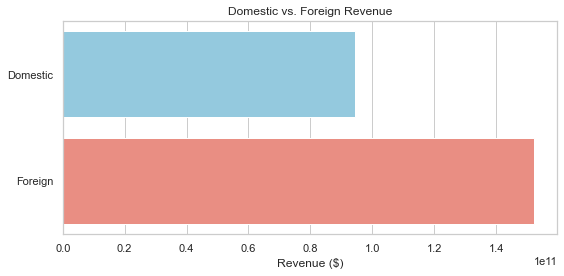

In [93]:
# Sum up total domestic and foreign gross
revenue_split = pd.DataFrame({
    'Revenue': ['Domestic', 'Foreign'],
    'Amount': [Gross_df['domestic_gross'].sum(), Gross_df['foreign_gross'].sum()]
})
# Horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Amount', y='Revenue', data=revenue_split, palette=['skyblue', 'salmon'])
plt.title('Domestic vs. Foreign Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('')
plt.tight_layout()
plt.show()


> 3. Genre trends vs Gross

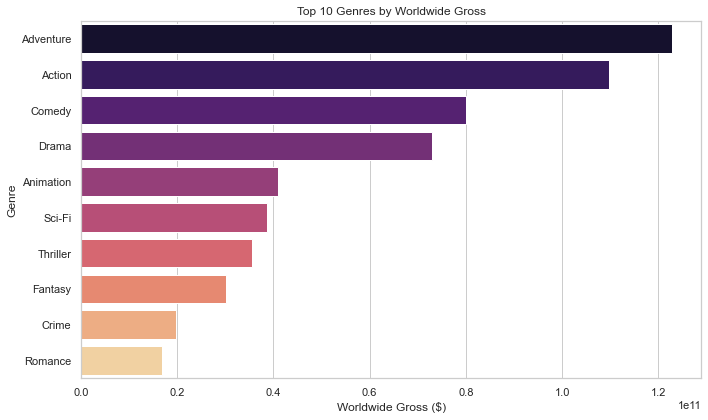

In [94]:
# Load movie_basics dataframe
movie_basics = pd.read_csv('./UnzippedCleanedData/Cleaned_movie_basics.csv')
# Clean and merge data
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
movie_basics['clean_title'] = movie_basics['primary_title'].str.lower().str.strip()
merged = pd.merge(Gross_df, movie_basics[['clean_title', 'genres']], on='clean_title', how='inner')

# Prepare and plot genre revenue
merged = merged.dropna(subset=['genres', 'worldwide_gross'])
merged['genres'] = merged['genres'].str.split(',')
merged = merged.explode('genres')
merged['genres'] = merged['genres'].str.strip()
genre_gross = merged.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='magma')
plt.title('Top 10 Genres by Worldwide Gross')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


> 4.Budget vs Gross

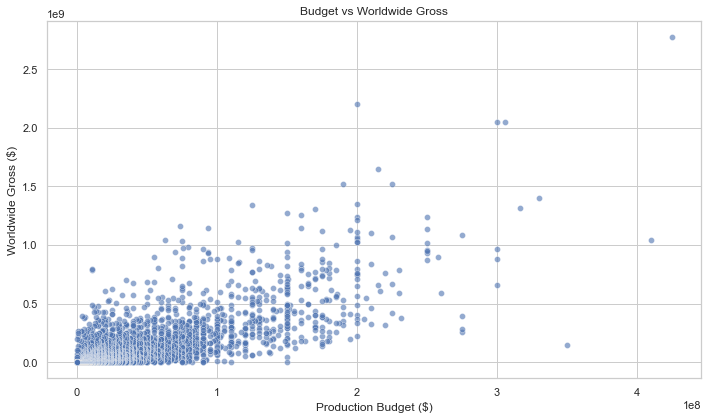

In [95]:
# Load budget data 
budget_df = pd.read_csv("./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv")
# Clean and convert currency columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    budget_df[col] = budget_df[col].replace('[\$,]', '', regex=True).astype(float)

# Scatter plot: Budget vs. Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=budget_df, x='production_budget', y='worldwide_gross', alpha=0.6)
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


> ## *Data Analytics and visualization conclusion*

- Explanations for created visualizations:

1. **TOP PERFORMING STUDIOS(OUR COMPETITORS)**
- VISUALIZATION: Bar Plot of Total Worldwide Gross by Studio

- EXPLANATION:This bar plot highlights the top 10 movie studios by total worldwide gross revenue. It helps identify the dominant studios in the film industry, showcasing which studios consistently produce high-grossing films. These studios represent our key competitors in terms of global reach and box office performance.
2. **DOMESTIC VS FOREIGN REVENUE SPLIT**
- VISUALIZATION: Horizontal side-by-side bar chart.

- EXPLANATION: The chart shows how studios earn revenue across domestic markets and foreign ones. It reveals whether a studio relies more heavily on local audiences or global audiences. For instance, some studios may earn the majority of their box office from international audiences, indicating strong overseas marketing and localization strategies. Understanding this split can guide our own studio's distribution and marketing priorities.
3. **GENRE VS GROSS**
- VISUALIZATION: Horizontal bar plot of Worldwide Gross vs Genre 

- EXPLANATION:This visualization shows which genres generate the highest total worldwide gross. By splitting and aggregating multi-genre entries, we get a clear view of the most profitable film types (e.g., action, adventure, animation).This insight helps align production strategies with market demand, allowing our studio to focus on genres that resonate with large audiences and maximize revenue potential.
4. **BUDGET VS GROSS**
- VISUALIZATION: Scatter Plot of Production Budget vs Worldwide Gross

- EXPLANATION: The scatter plot compares production budgets to worldwide gross revenue, showing the relationship between investment and returns.A positive correlation is usually visible, where higher-budget films tend to earn more, though not always proportionally.Outliers (low-budget, high-gross films) can reveal high ROI opportunities. This chart helps assess risk vs reward, guiding smarter budgeting decisions based on historical performance.


 ## 【4】*Hypothesis Testing* 

> 1.**Domestic vs Foreign Revenue Split (Paired T-Test)**

Null Hypothesis(H0): The averages of both Domestic and Foreign revenue are equal.

Alternative Hypothesis(H1): There is a significant difference between the averages of Domestic and foreign revenue.

In [96]:
# loading  the cleaned datasets
Gross_df = pd.read_csv('./UnzippedCleanedData/Cleaned_bom.movie_gross.csv')
budget_df = pd.read_csv('./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv')

# Clean titles to help with merging
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
budget_df['clean_title'] = budget_df['movie'].str.lower().str.strip()

# Merge on clean title
merged_df = pd.merge(budget_df, Gross_df, on='clean_title', how='inner')

# Fix column names 
merged_df.rename(columns={
    'domestic_gross_y': 'domestic_gross',
    'foreign_gross_y': 'foreign_gross'
}, inplace=True)

# Convert gross columns to numeric
merged_df['domestic_gross'] = pd.to_numeric(merged_df['domestic_gross'], errors='coerce')
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')

# Drop rows where gross values are NaN or zero
rev_df = merged_df.dropna(subset=['domestic_gross', 'foreign_gross']).copy()
rev_df = rev_df[(rev_df['domestic_gross'] > 0) & (rev_df['foreign_gross'] > 0)]

In [97]:
# Paired t-test
t_stat, p_val = ttest_rel(rev_df['domestic_gross'], rev_df['foreign_gross'])
print(f"Paired T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The Domestic and foreign grosses are significantly different (reject H₀).")
else:
    print("There is no significant difference between domestic and foreign revenue (fail to reject H₀).")


Paired T-statistic: -10.71, P-value: 0.0000
The Domestic and foreign grosses are significantly different (reject H₀).


Since the p-value(rounded) < 0.05 , We are cleared to reject the null hypothesis.There is a statistically significant difference between domestic and foreign revenue. On average, one outperforms the other.

> 2.High vs Low Budget ROI Comparison (T-Test)

Null Hypothesis(H0): ROI is the same regardless if the film is high budget or low budget.

Alternative Hypothesis(H1): ROI differs significantly between high budget and low budget films

In [98]:
# Loading cleaned datasets
Gross_df = pd.read_csv('./UnzippedCleanedData/Cleaned_bom.movie_gross.csv')
budget_df = pd.read_csv('./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv')

# Clean titles to help with merging
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
budget_df['clean_title'] = budget_df['movie'].str.lower().str.strip()

# Merge datasets on clean title
merged_df = pd.merge(budget_df, Gross_df, on='clean_title', how='inner')

# Fix column names
merged_df.rename(columns={
    'domestic_gross_y': 'domestic_gross',
    'foreign_gross_y': 'foreign_gross'
}, inplace=True)

# Convert relevant columns to numeric (removing $ and commas)
merged_df['production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing or zero budget/gross
roi_df = merged_df.dropna(subset=['production_budget', 'worldwide_gross']).copy()
roi_df = roi_df[(roi_df['production_budget'] > 0) & (roi_df['worldwide_gross'] > 0)]

In [99]:
# Calculate ROI = Gross / Budget
roi_df['ROI'] = roi_df['worldwide_gross'] / roi_df['production_budget']

# Median split into high and low budget
median_budget = roi_df['production_budget'].median()
high_budget = roi_df[roi_df['production_budget'] >= median_budget]
low_budget = roi_df[roi_df['production_budget'] < median_budget]

# Run independent t-test on ROI
t_stat, p_val = ttest_ind(high_budget['ROI'], low_budget['ROI'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in ROI between high and low budget films (reject H₀).")
else:
    print("No significant difference in ROI between high and low budget films (fail to reject H₀).")


T-statistic: -3.60, P-value: 0.0004
There is a significant difference in ROI between high and low budget films (reject H₀).


The T-statistic(-3.60),indicates that the mean ROI for low-budget films is significantly higher than that for high-budget films (the negative value suggests the direction).

The p-value < 0.05 therefore we have a clear to reject the null hypothesis.

Low-budget films, on average, tend to have a higher return on investment than high-budget films.This suggests that while big-budget films often bring in large gross revenues, they don't necessarily yield proportionally higher returns relative to their cost.

> 3. Budget Impact on Gross(Correlation Test)

Null Hypothesis(H0): There is no correlation between Budget and Worldwide Gross.

Alternative Hypothesis(H1): There is a significant correlation between Budget and worldwide Gross.

In [100]:
# Loading cleaned datasets
Gross_df = pd.read_csv('./UnzippedCleanedData/Cleaned_bom.movie_gross.csv')
budget_df = pd.read_csv('./UnzippedCleanedData/Cleaned_tn_movie_budgets.csv')

# Clean titles to help with merging
Gross_df['clean_title'] = Gross_df['title'].str.lower().str.strip()
budget_df['clean_title'] = budget_df['movie'].str.lower().str.strip()

# Merge datasets on clean title
merged_df = pd.merge(budget_df, Gross_df, on='clean_title', how='inner')

# Fix column names
merged_df.rename(columns={
    'domestic_gross_y': 'domestic_gross',
    'foreign_gross_y': 'foreign_gross'
}, inplace=True)

# Convert relevant columns to numeric (removing $ and commas)
merged_df['production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing or zero budget/gross
df_corr = merged_df.dropna(subset=['production_budget', 'worldwide_gross'])

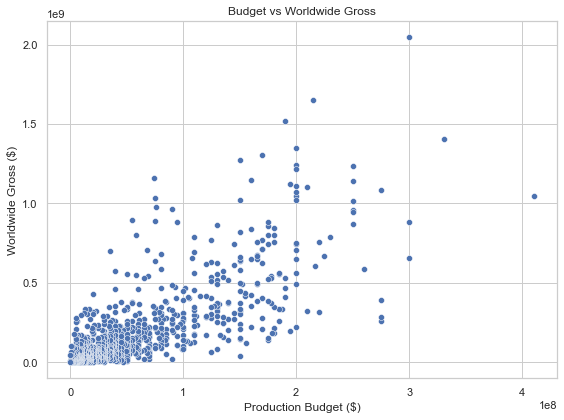

Pearson Correlation: 0.77, P-value: 0.0000
There is significant correlation between budget and gross (reject H₀).


In [101]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='production_budget', y='worldwide_gross')
plt.title('Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.tight_layout()
plt.show()

# Pearson correlation test
corr, p_value = pearsonr(df_corr['production_budget'], df_corr['worldwide_gross'])
print(f"Pearson Correlation: {corr:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is significant correlation between budget and gross (reject H₀).")
else:
    print("There is no significant correlation found between budget and gross (fail to reject H₀).")

The pearson correlation coefficient = 0.77, which indicates that there is a strong positive correlation between budget and Gross, suggesting that as production budget increases, the worldwide gross also tends to increase significantly.
The p-value < 0.05,Since the p-value is far below 0.05, you can reject the null hypothesis. The result is statistically significant and unlikely due to random chance.

## CONCLUSION

Through a series of statistical tests and visualizations, we derived meaningful business insights from historical movie data:

> **BUSINESS RECOMMENDATIONS**

> 1. Domestic VS Foreign Market Gross

The Paired t-test revealed a significant difference between domestic and foreign grosses (t = -10.71, p < 0.0001).Indicating that Foreign markets often contribute more to a film’s revenue than domestic markets, underlining the importance of global distribution strategies.

> 2. Budget VS Return On Investment(ROI)

The T-test between high-budget and low-budget films showed that low-budget films have significantly higher ROI (t = -3.60, p = 0.0004).While big budgets can generate high gross, lower-budget films tend to be more efficient in converting investment into profit. This supports the value of lean(What the customer is willing to pay for), targeted productions.

 >   3. Budget VS Worldwide Gross

We got a strong positive Pearson correlation between budget and worldwide gross: r = 0.77, p < 0.0001.Bigger budgets are associated with higher gross, indicating the effectiveness of investment in production and marketing.

> 4. Benchmark against Top Studios

We identified the top-performing studios based on box office revenue. Analyzing their business models, marketing strategies, and production choices can offer valuable insights into industry best practices. By understanding how these successful studios operate, we can refine our own strategies and position ourselves more competitively in the market.

## DATA PREPARATION(THE MOVIE DB)

###  **OBJECTIVES**

i). **To identify the most successful genres**- Check for the most common and popular genre & which genres have the highest audience ratings and popularity scores

Key takeaway:*Inorder to help the studio choose the right type of movies to produce*

ii). **To understand what factors make a movie popular**- Check how factors like release date, language, vote average, and vote count relate to a movie's success

Key takeaway:*Inorder to help us understand what elements drive a hit*

iii). **To provide actionable insights for strategic movie production**-Based on the data, give recommendations what type of movies(genre, language,release date) the studio should focus on

Key takeaway: *Inorder to directly support business decisions with significant strategies*

## 【1】*Data Exploration* 

In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [103]:
# Load the dataset
df = pd.read_csv("./Data/tmdb.movies.csv.gz", compression='gzip', index_col=0)

# Display the first 10 rows of the dataset
df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [104]:
# show basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


.info() helps us see missing values, column types, number of rows and the total number of columns.  Our data frame has 26517 Rows and 9 columns

In [105]:
# Check for the shape of the dataset
df.shape

(26517, 9)

In [106]:
# Summary Statistics
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


.describe() shows the averages, medians, minimum, maximum, standard deviation and upper&lower quartiles for the numeric columns.

In [107]:
# Check for missing values
df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## 【2】*Data Cleaning* 

In [108]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date']

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

converting the column ensures that all dates are in a consistent format and that you can perform operations like extracting the year, month or day, filtering data by specific date ranges and Sorting or Grouping data by time periods. 

errors=`coerce` converts invalid/missing dates to Not a time making it easier to handle data

In [109]:
# Convert 'genre_ids' from string to list of integers
# import ast because the genre_ids are stored as text that looks like a list
# use the ast.literal_eval() because it safely converts a string into real python objects(list,dict,etc)
import ast
df['genre_ids'] = df['genre_ids'].apply(ast.literal_eval)
df['genre_ids'].head(10)

0             [12, 14, 10751]
1         [14, 12, 16, 10751]
2               [12, 28, 878]
3             [16, 35, 10751]
4               [28, 878, 12]
5             [12, 14, 10751]
6           [28, 12, 14, 878]
7             [16, 10751, 35]
8             [16, 10751, 35]
9    [16, 28, 35, 10751, 878]
Name: genre_ids, dtype: object

In [110]:
# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [111]:
# Display the first 5 rows of the dataset
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [112]:
# Standard TMDB genre ID to name mapping
genre_id_to_name = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

# Expand genre_ids into individual rows for analysis
df_exploded = df.explode('genre_ids')
df_exploded['genre_name'] = df_exploded['genre_ids'].map(genre_id_to_name)

# Drop rows where genre_id didn't match a known genre
df_exploded = df_exploded.dropna(subset=['genre_name'])

# Calculate genre statistics
genre_stats = df_exploded.groupby('genre_name').agg(
    movie_count=('id', 'count'),
    avg_popularity=('popularity', 'mean'),
    avg_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).sort_values(by='movie_count', ascending=False)

genre_stats.reset_index()


,genre_name,movie_count,avg_popularity,avg_vote,total_votes
0,Drama,8303,3.978203,6.112200,2064637
1,Comedy,5652,3.863435,5.942074,1403883
2,Documentary,4965,1.348202,6.817946,62283
3,Thriller,4207,4.840918,5.354433,1342877
4,Horror,3683,3.245644,4.847624,502490
5,Action,2612,6.495047,5.578560,1912290
6,Romance,2321,4.162464,5.981603,621223
7,Science Fiction,1762,5.238197,5.442736,1222644
8,Family,1565,4.735889,5.990479,652585
9,Crime,1515,5.416396,5.852475,632691


`.explode()` separates list items into individual rows. In our dataset, each movie can belong to multiple genres. Therefore, if you don't split them apart, you can't analyze genres one-by-one. You'll be stuck treating [12,14,10751] as one "***thing***".

Key takeaway; 
with `.explode()` one movie=many rows,one genre per row which can be easy to analyze
without `.explode()` one movie=one row with many genres which can be hard to analyze genres separately

-  Drama and Comedy dominate in quantity.

-  Adventure is the most popular genre on average.

-  Animation, Music and History get higher average ratings.

-  For wide appeal and strong fan response, Action + Adventure is a potent combination.

## 【3】*Data Analysis and Visualization* 

>#### Objective 1. ***Identify the most successful genres***

In [113]:
# Sort genres by average popularity in descending order
top_genres = genre_stats.sort_values(by='avg_popularity', ascending=False)

# Reset the index for better readability
top_genres.reset_index()

,genre_name,movie_count,avg_popularity,avg_vote,total_votes
0,Adventure,1400,7.557082,5.930071,1645828
1,Action,2612,6.495047,5.578560,1912290
2,Fantasy,1139,6.387318,5.952327,902816
3,Crime,1515,5.416396,5.852475,632691
4,War,330,5.320197,6.229394,141336
5,Science Fiction,1762,5.238197,5.442736,1222644
6,Thriller,4207,4.840918,5.354433,1342877
7,Mystery,1237,4.821546,5.730315,442671
8,Family,1565,4.735889,5.990479,652585
9,Animation,1486,4.584240,6.464805,506612


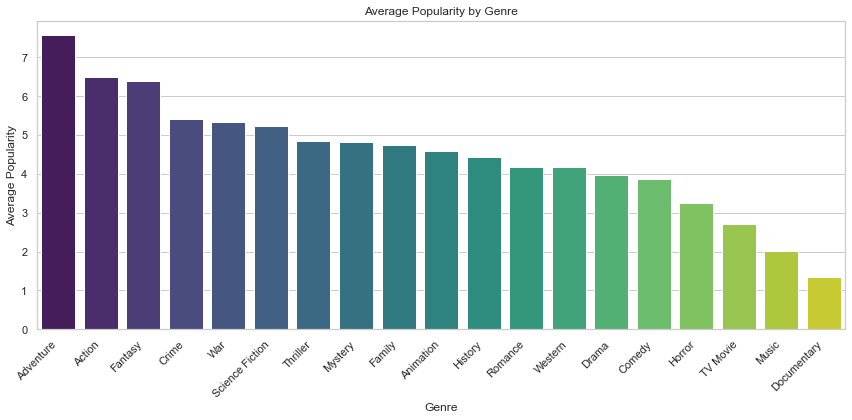

In [114]:
# Most Common and popular genre
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Bar plot: Top genres by average popularity
top_genres = genre_stats.sort_values(by='avg_popularity', ascending=False)

sns.barplot(data=top_genres, x=top_genres.index, y='avg_popularity', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show();


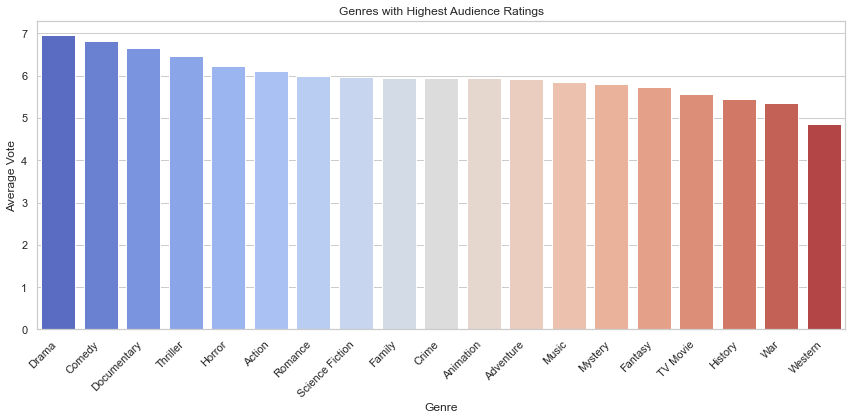

In [115]:
# Plot for Genre with highest average vote
# Set style 
plt.figure(figsize=(12, 6)) 
sns.set(style="whitegrid")

# Bar plot: Genres with highest average vote
sns.barplot(data=genre_stats.sort_values(by='avg_vote', ascending=False), 
            x=genre_stats.index, y='avg_vote', palette='coolwarm')
plt.title('Genres with Highest Audience Ratings')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Vote')
plt.tight_layout()
plt.show();

#### ***Actionable Insights From This Analysis***
>**Genre-Based Insights**

-**Adventure and Action films show the highest average popularity**, making them ideal choices for wide-audience appeal.

-**Drama and Comedy dominate in quantity**, offering diverse storytelling potential but require standout narratives to break through.

-**Animation, Music and History genres receive higher average ratings**, suggesting they excel in quality and critical reception, albeit often with smaller niche audiences that is;

   - *"receive higher average ratings"*: When viewers rate movies (on platforms like TMDB), Animation and History movies tend to get higher scores (e.g., 7.5 out of 10), meaning people who watch them generally think they're good.

   - *"suggesting they excel in quality and critical reception"*: These higher ratings imply that these genres are often well-made — whether in terms of storytelling, visuals, or emotional impact. They’re also more likely to be appreciated by critics or win awards.

   - *"albeit often with smaller niche audiences"*: However, these genres typically don’t attract huge numbers of viewers like Action or Comedy. Instead, they appeal to specific groups of people who actively seek them out — such as history enthusiasts or animation fans.

>#### Objective 2. ***Factors that make a movie popular*** 

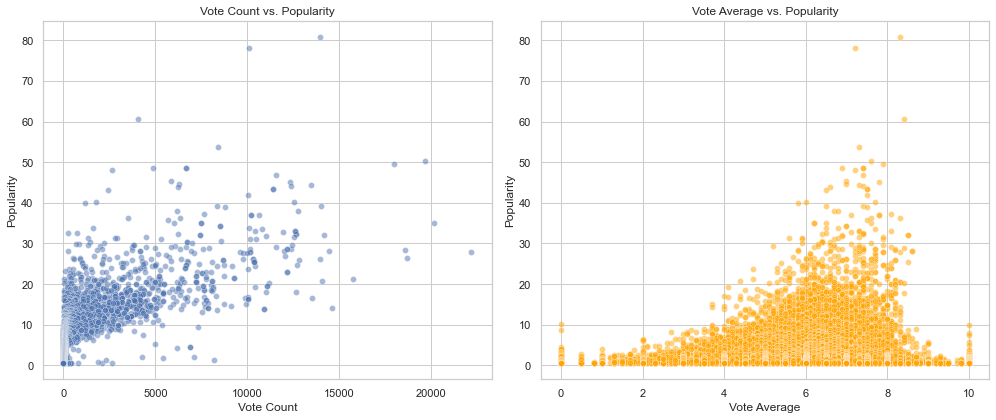

In [116]:
# Scatter plots: Vote Count and Vote Average vs. Popularity
plt.figure(figsize=(14, 6))

# Plot Vote Count vs. Popularity
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='vote_count', y='popularity', alpha=0.5)
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')

# Plot Vote Average vs. Popularity
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='vote_average', y='popularity', alpha=0.5, color='orange')
plt.title('Vote Average vs. Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show();

This visualization consists of two scatter plots that explore the relationships between **popularity**, **vote count**, and **vote average**:

**i. Vote Count vs. Popularity**
- **Observation**:
  - There is a **positive correlation** between vote count and popularity.
  - Movies with higher vote counts tend to have higher popularity scores.
  - However, there is a cluster of movies with low vote counts and low popularity, indicating many movies are not widely popular or voted on.
- **Interpretation**:
  - Popularity is influenced by the number of votes a movie receives. Movies with more votes are likely to have been seen by a larger audience, contributing to their popularity.
  - Outliers with high popularity but low vote counts may represent niche or trending movies that gained attention quickly.

**ii. Vote Average vs. Popularity**

- **Observation**:
  - There is a **weak or no clear correlation** between vote average and popularity.
  - Movies with high popularity can have a wide range of vote averages, from low to high.
  - Most movies cluster around a vote average of 6–8, regardless of popularity.
- **Interpretation**:
  - Popularity does not strongly depend on the average rating of a movie. A movie can be popular even if its ratings are average or below average.
  - This suggests that factors other than quality (e.g., marketing, star power, or genre) may drive popularity.

### **Actionable Insights From This Analysis**
> **Factor-Based Insights**
1. **Vote Count is a Stronger Predictor of Popularity**: Movies with more votes are generally more popular, indicating audience engagement is a key factor in popularity.
2. **Vote Average has Limited Influence on Popularity**: High ratings do not necessarily translate to high popularity. Popularity may be driven by external factors like promotion or cultural trends.
3. **Clusters and Outliers**:
   - The clustering of movies with low vote counts and low popularity suggests many movies fail to reach a wide audience.
   - Outliers with high popularity but low vote counts or low ratings may represent viral or niche movies.

This analysis highlights the importance of audience engagement (vote count) over critical acclaim (vote average) in determining a movie's popularity.

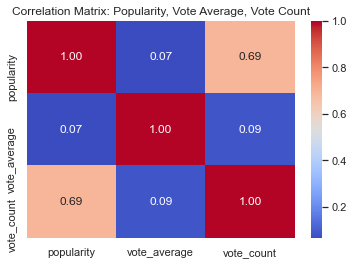

In [117]:
# Correlation Heatmap among selected numerical features
cols = ['popularity', 'vote_average', 'vote_count']
corr = df[cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Popularity, Vote Average, Vote Count')
plt.show()

Correlation Heatmap calculates the correlation matrix for popularity, vote_average, and vote_count to quantitatively assess how these factors relate.
Therefore, the heatmap offers an intuitive visual representation(direction) and shows strength of these relationships. This makes it easier to identify which factors are most strongly associated with movie popularity.

- *Stronger correlation between vote_count and popularity since;*
**Diagonal Values (1.00):** The diagonal represents the correlation of each variable with itself, which is always 1.00 (perfect correlation).

- *Moderate correlation between popularity and vote_count since;*
**Popularity and Vote Count (0.69):** There is a moderately strong positive correlation (0.69) between popularity and vote_count. This suggests that movies with more votes tend to be more popular.

- *Weaker or inconsistent link between vote_average and popularity since;*
**Popularity and Vote Average (0.07):** There is a very weak positive correlation (0.07) between popularity and vote_average. This indicates that the average rating of a movie has little to no relationship with its popularity.

>### **Hypothesis Testing Based on the Correlation Matrix**
**A. Define the Hypotheses**

**Hypothesis 1: Relationship between Popularity and Vote Count**

- **Null Hypothesis (H₀):** There is no significant correlation between `popularity` and `vote_count` (correlation = 0).

- **Alternative Hypothesis (H₁):** There is a significant correlation between `popularity` and `vote_count` (correlation ≠ 0).

**Hypothesis 2: Relationship between Popularity and Vote Average**

- **Null Hypothesis (H₀):** There is no significant correlation between `popularity` and `vote_average` (correlation = 0).

- **Alternative Hypothesis (H₁):** There is a significant correlation between `popularity` and `vote_average` (correlation ≠ 0).


**B. Select a Statistical Test**

To test the significance of the correlations, you can use the **Pearson correlation coefficient test**. This test evaluates whether the observed correlation is significantly different from zero.

**C. Perform the Test**

Use the `scipy.stats.pearsonr` function to calculate the correlation coefficient and the p-value for each pair of variables.



In [118]:
# Correlation Analysis
# Statistical test for correlation between popularity and vote_count, vote_average
# Import necessary libraries
from scipy.stats import pearsonr

# Test correlation between popularity and vote_count
corr_popularity_vote_count, p_value_popularity_vote_count = pearsonr(df['popularity'], df['vote_count'])

# Test correlation between popularity and vote_average
corr_popularity_vote_average, p_value_popularity_vote_average = pearsonr(df['popularity'], df['vote_average'])

# Print results
print("Correlation between Popularity and Vote Count:")
print(f"Correlation Coefficient: {corr_popularity_vote_count:.2f}, P-value: {p_value_popularity_vote_count:.4f}")

print("\nCorrelation between Popularity and Vote Average:")
print(f"Correlation Coefficient: {corr_popularity_vote_average:.2f}, P-value: {p_value_popularity_vote_average:.4f}")


Correlation between Popularity and Vote Count:
Correlation Coefficient: 0.69, P-value: 0.0000

Correlation between Popularity and Vote Average:
Correlation Coefficient: 0.07, P-value: 0.0000


**D. Results Interpretation**

The correlation coefficient between popularity and vote count is 0.69 which indicates a moderately strong positive correlation. Movies with higher vote counts tend to have higher popularity scores which suggests that audience engagement is a key driver of popularity.
The P-value<0.05, meaning the correlation is statistically significant therefore, we reject the null hypothesis. We can confidently conclude that there is a meaningful relationship between vote count and popularity

The correlation coefficient between popularity and vote average is 0.07 which indicates a very weak positive correlation. The average ratin g of molvie has little to no impact on its popularity. A movie can  be popular regardless of whether it has high or low ratings.
The P-value<0.05, meaning the weak correlation is statistically significant therefore, we reject the null hypothesis. However, the strength of the relationship is so small that it is unlikely to have practical importance


>#### Objective 3. ***Provide Insights for Strategic Movie Production***


In [119]:
# Extract release year
df['release_year'] = df['release_date'].dt.year

# Group by release year
yearly_stats = df.groupby('release_year').agg({
    'id': 'count',
    'popularity': 'mean',
    'vote_average': 'mean'
}).rename(columns={'id': 'movie_count'})

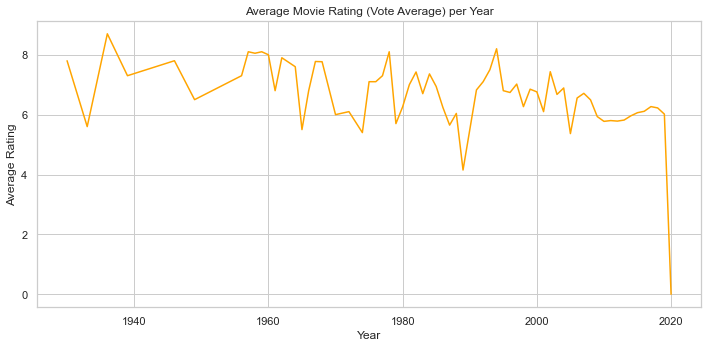

In [120]:
# Average Vote Average per Year
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='vote_average', color='orange')
plt.title("Average Movie Rating (Vote Average) per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show();

#### **Actionable Insights From This Analysis**
>**Trends-Based Insights**

- *Trends Over Time*:

-There’s been a steady increase in movie production over the past few decades, indicating a highly competitive market. However, the sharp drop in 2020 could be due to incomplete data or the impact of the COVID-19 pandemic, which significantly disrupted the movie industry (e.g., fewer releases, limited audience engagement).

-Average ratings have remained relatively stable, suggesting that while volume increases, quality (as perceived by audiences) doesn’t fluctuate dramatically.



## Conclusion

**Business Recommendations**: 
1. **Focus on Consistency**:Since ratings have remained stable, studios should focus on maintaining consistent quality rather than chasing trends that may not significantly impact ratings.

2. **Popularity**: Action and Adventure are the most popular making them ideal choices for wide-audience appeal.

3. **Focus on Values of lean**: Movies with higher vote counts tend to have higher popularity scores. This suggests that audience engagement is a key driver of popularity therefore, our films should focus on customer's needs to ensure our audience engagement is high.

## DATA PREPARATION(Rotten Tomatoes)

#  Analyzing Movie Reception Using Rotten Tomatoes Data  

## 🧠 **Introduction**  
Rotten Tomatoes is one of the most influential movie review platforms, aggregating critic and audience opinions into a **"Tomatometer"** and **audience score**. In this section, we explore the relationship between these scores and movie performance. By examining how critical reception aligns with box office success and genres, we aim to uncover whether review scores can be used to predict or inform a movie's commercial potential.  

In this project, I will analyze **RottenTomatoes data**:  
- **Understand the distribution of critic and audience scores** across movies from recent years.

- **Identify which genres tend to receive higher critical acclaim** and whether they align with audience preferences.

- **Compare critic vs. audience sentiment** to find genres or films with the biggest discrepancies.


## 【1】*Data Exploration*  

In [121]:
# Import pandas
import pandas as pd

In [122]:
# Load movies data
movies_df = pd.read_csv('Data/rt.movie_info.tsv.gz', sep='\t', compression='gzip')
movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [123]:
#Load reviews
reviews_df = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', compression='gzip', encoding='latin1')
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [124]:
# Selecting relevant columns from the movie data
movies_df = movies_df[['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'box_office']]

# Selecting relevant columns from the review data
reviews_df = reviews_df[['id', 'review', 'rating', 'fresh', 'critic', 'publisher', 'date']]

In [125]:
# Check the dimensions of the dataset (rows, columns)
movies_df.shape , reviews_df.shape

((1560, 8), (54432, 7))

In [126]:
# View a summary of the movies dataset columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   box_office    340 non-null    object
dtypes: int64(1), object(7)
memory usage: 97.6+ KB


In [127]:
# View statistical information about the dataset
movies_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


### **Data Exploration Conclusion**  

The **movies dataset** contains 1,560 entries, each representing a movie. It includes several columns such as id, synopsis, rating, genre, director, writer, theater_date, and box_office. While the id column ranges from 1 to 2000, some columns have a considerable amount of missing data. For instance, director, writer, and box_office have a significant number of missing values, with only 1,361, 1,111, and 340 non-null entries, respectively. The synopsis and rating columns are relatively complete, with 1,498 and 1,557 non-null entries, respectively. This suggests that while there is enough data to describe most movies, there are gaps in the more specific details like the creators and financial performance. The movie id values have a mean of approximately 1,007, with a standard deviation of 579, indicating a wide range of movie IDs across the dataset.

In [128]:
# View a summary of the reviews dataset columns
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         54432 non-null  int64 
 1   review     48869 non-null  object
 2   rating     40915 non-null  object
 3   fresh      54432 non-null  object
 4   critic     51710 non-null  object
 5   publisher  54123 non-null  object
 6   date       54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [129]:
# View statistical information about the reviews dataset
reviews_df.describe()

,id
count,54432.000000
mean,1045.706882
std,586.657046
min,3.000000
25%,542.000000
50%,1083.000000
75%,1541.000000
max,2000.000000


The **reviews dataset** is much larger, containing 54,432 entries. It provides a wealth of information about the reviews for these movies, including the id (which links to the movie dataset), review text, rating, fresh (whether the review is fresh or rotten), critic, publisher, and date. The id column in the reviews dataset matches the id in the movies dataset, making it possible to link the two datasets. However, there are missing values in columns like review and rating, with 48,869 and 40,915 non-null entries, respectively. The fresh and publisher columns are fully populated, providing reliable data on the sentiment of reviews and their sources. The id values in the reviews dataset range from 3 to 2000, with a mean of approximately 1,046, and a standard deviation of 587, indicating a broad distribution of reviews across movies.

In [130]:
# Merge the datasets on 'id' column
merged_df = pd.merge(movies_df, reviews_df, on='id', how='outer')
merged_df.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,box_office,review,rating_y,fresh,critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,MUBI,"November 16, 2017"


In [131]:
# Check the dimensions of the merged dataset (rows, columns)
merged_df.shape

(54857, 14)

In [132]:
# View a summary of the merged dataset columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54857 entries, 0 to 54856
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54857 non-null  int64 
 1   synopsis      54680 non-null  object
 2   rating_x      54769 non-null  object
 3   genre         54764 non-null  object
 4   director      49339 non-null  object
 5   writer        45426 non-null  object
 6   theater_date  53411 non-null  object
 7   box_office    33351 non-null  object
 8   review        48869 non-null  object
 9   rating_y      40915 non-null  object
 10  fresh         54432 non-null  object
 11  critic        51710 non-null  object
 12  publisher     54123 non-null  object
 13  date          54432 non-null  object
dtypes: int64(1), object(13)
memory usage: 6.3+ MB


In [133]:
# View statistical information of the dataset
merged_df.describe()

,id
count,54857.000000
mean,1045.483749
std,586.631039
min,1.000000
25%,542.000000
50%,1083.000000
75%,1541.000000
max,2000.000000


When examining both datasets, it becomes clear that while the movies dataset is relatively small and suffers from significant gaps in specific columns, the reviews dataset is much larger and provides more complete data in certain areas. The movie dataset contains crucial metadata about the movies, but often lacks detailed financial and creative information. The reviews dataset, although it has some missing review texts and ratings, still offers enough information to perform analysis, especially since the fresh column is fully populated. The id column is common in both datasets, which makes it easy to merge the two, but due to missing values in both, careful handling of these gaps is necessary when conducting further analysis.

In [134]:
# Save the merged dataset to a CSV file
merged_df.to_csv('merged_movie_reviews.csv', index=False)

## 【2】*Data Cleaning*  

###  Why Cleaning?  
- **Ensures Data Accuracy** → Missing values can distort trends and patterns.  
- **Improves Visualization** → Charts and graphs require complete data for meaningful insights.   

To ensure that final insights are reliable and data-driven, missing values need to be properly handle.  

Checklist:  
- Drop columns with excessive missing values.  
- Fill or impute missing values where necessary.  
- Filter and refine the dataset for meaningful analysis. 

#### Handling Missing Values *Rows*

In [135]:
# Check for missing values in each column
merged_df.isna().sum()

id                  0
synopsis          177
rating_x           88
genre              93
director         5518
writer           9431
theater_date     1446
box_office      21506
review           5988
rating_y        13942
fresh             425
critic           3147
publisher         734
date              425
dtype: int64

In [136]:
# Calculate the percentage of missing data in each column
missing_percent = merged_df.isna().mean()*100
missing_percent

id               0.000000
synopsis         0.322657
rating_x         0.160417
genre            0.169532
director        10.058880
writer          17.191972
theater_date     2.635944
box_office      39.203748
review          10.915653
rating_y        25.415170
fresh            0.774742
critic           5.736734
publisher        1.338024
date             0.774742
dtype: float64

In [137]:
#Drop rows with missing values in essential columns
merged_df.dropna(subset=['synopsis','rating_x','genre','director','writer','theater_date','box_office','review','rating_y','fresh','critic','publisher','date'], inplace=True)

In [138]:
#Recheck for missing values in each column
merged_df.isna().sum()

id              0
synopsis        0
rating_x        0
genre           0
director        0
writer          0
theater_date    0
box_office      0
review          0
rating_y        0
fresh           0
critic          0
publisher       0
date            0
dtype: int64

In [139]:
# Check duplicates based only on 'id' column
duplicates = merged_df.duplicated()
print(f"Number of duplicate IDs: {duplicates.sum()}")

Number of duplicate IDs: 0


In [140]:
# View a summary of the cleaned merged dataset columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18864 entries, 1 to 54309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18864 non-null  int64 
 1   synopsis      18864 non-null  object
 2   rating_x      18864 non-null  object
 3   genre         18864 non-null  object
 4   director      18864 non-null  object
 5   writer        18864 non-null  object
 6   theater_date  18864 non-null  object
 7   box_office    18864 non-null  object
 8   review        18864 non-null  object
 9   rating_y      18864 non-null  object
 10  fresh         18864 non-null  object
 11  critic        18864 non-null  object
 12  publisher     18864 non-null  object
 13  date          18864 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.2+ MB


## 【3】*Data Visualization & Analysis*  

### 1. **Distribution of Movie Ratings**
- Why? See how ratings (like 'R', 'PG-13', etc.) are distributed.

- Type: Bar Chart

- Useful For Hypothesis Testing: Compare success (box office, reviews) across ratings.

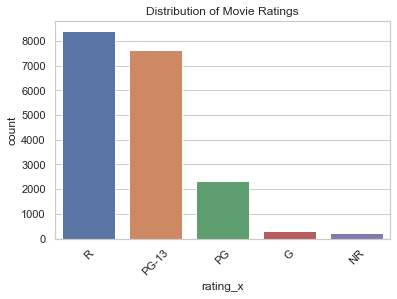

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot
sns.countplot(data=merged_df, x='rating_x', order=merged_df['rating_x'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Movie Ratings')
plt.show()

## 🧪 Hypothesis:
- Null Hypothesis (H₀): At least one rating category has a different average revenue.
- Alternative Hypothesis (H₁): No significant difference across rating categories.
### Anova Test
This is to test whether average box office revenue has a significant difference in regards to movie ratings.

In [ ]:
import scipy.stats as stats

# Copy and clean the data
df_anova = merged_df.copy()

# Clean box_office column
df_anova['box_office'] = df_anova['box_office'].replace('[\$,]', '', regex=True)
df_anova['box_office'] = pd.to_numeric(df_anova['box_office'], errors='coerce')

# Drop rows with missing box_office or rating_x
df_anova = df_anova.dropna(subset=['box_office', 'rating_x'])

# Filter to common ratings only (optional, to reduce noise)
common_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']
df_anova = df_anova[df_anova['rating_x'].isin(common_ratings)]

# --- Run ANOVA ---
groups = [group['box_office'].dropna() for name, group in df_anova.groupby('rating_x')]
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ We reject the null hypothesis: At least one rating category has a different average revenue.")
else:
    print("❌ We fail to reject the null hypothesis: No significant difference across rating categories.")


F-statistic: 607.843
P-value: 0.00000
✅ We reject the null hypothesis: At least one rating category has a different average revenue.


### 2. **Box Office Revenue vs Freshness**
- Type: Box plot

- Useful For Hypothesis Testing:Movies with a ‘Fresh’ rating earn more revenue than those with a ‘Rotten’ rating. 

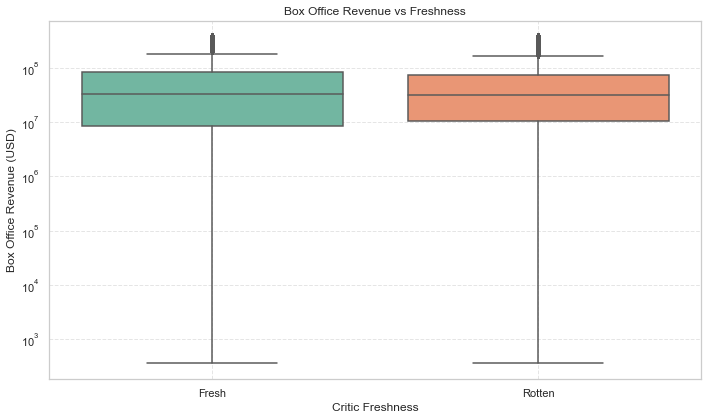

In [143]:
# Make a copy to avoid altering original
df = merged_df.copy()

# Clean 'box_office' column 
# Remove currency symbols and commas, convert to numeric
df['box_office'] = df['box_office'].replace('[\$,]', '', regex=True)
df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')

# Drop rows with missing values in 'box_office' or 'fresh'
df_clean = df.dropna(subset=['box_office', 'fresh'])

# Simplify 'fresh' into binary (Fresh vs Rotten)
df_clean['fresh_binary'] = df_clean['fresh'].map({'fresh': 'Fresh', 'rotten': 'Rotten'})

# Plotting 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='fresh_binary', y='box_office', palette='Set2')
plt.title('Box Office Revenue vs Freshness')
plt.xlabel('Critic Freshness')
plt.ylabel('Box Office Revenue (USD)')
plt.yscale('log')  # Optional: log scale to handle skew
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🧪 Hypothesis:
- Null Hypothesis (H₀): There is no significant difference in box office revenue between "Fresh" and "Rotten" movies.

- Alternative Hypothesis (H₁): "Fresh" movies earn significantly more than "Rotten" movies.

In [144]:
from scipy.stats import ttest_ind

# Filter data again for safety
df_ttest = df_clean[df_clean['fresh_binary'].isin(['Fresh', 'Rotten'])]

# Split into two groups
fresh_revenue = df_ttest[df_ttest['fresh_binary'] == 'Fresh']['box_office']
rotten_revenue = df_ttest[df_ttest['fresh_binary'] == 'Rotten']['box_office']

# Perform independent t-test (Welch’s t-test by default)
t_stat, p_value = ttest_ind(fresh_revenue, rotten_revenue, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ We reject the null hypothesis: Fresh movies earn significantly more.")
else:
    print("❌ We fail to reject the null hypothesis: No significant revenue difference.")


T-statistic: 7.388
P-value: 0.00000
✅ We reject the null hypothesis: Fresh movies earn significantly more.


### 3. Genre vs Freshness Analysis
- Why? See if certain genres get better ("fresh") ratings more often.

- Type: Grouped Bar Chart or Proportion Chart

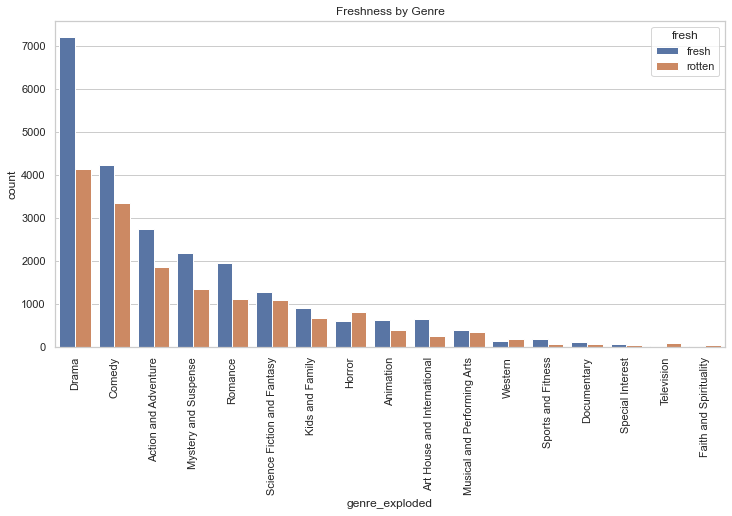

In [145]:
# Explode genres if multiple genres are combined with '|'
merged_df['genre_exploded'] = merged_df['genre'].str.split('|')

# Expand rows for each genre
genre_df = merged_df.explode('genre_exploded')

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=genre_df, x='genre_exploded', hue='fresh', order=genre_df['genre_exploded'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Freshness by Genre')
plt.show()

### 🧪 Hypothesis Statement (for statistical testing):
Null Hypothesis (H₀): Freshness (fresh vs. rotten) is independent of movie genre—there’s no association.

Alternative Hypothesis (H₁): Freshness is dependent on movie genre—some genres tend to get more fresh reviews than others.

This is a chi-square test for independence, since both genre and fresh are categorical variables.

In [146]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(genre_df['genre_exploded'], genre_df['fresh'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_val:.5f}")

# Conclusion
if p_val < 0.05:
    print("✅ We reject the null hypothesis: Freshness is dependent on genre.")
else:
    print("❌ We fail to reject the null hypothesis: No significant association between genre and freshness.")


Chi-Square Statistic: 565.22
Degrees of Freedom: 16
P-value: 0.00000
✅ We reject the null hypothesis: Freshness is dependent on genre.


### **✅ Conclusion**
##### The analysis provides strong statistical evidence to guide strategic decisions for the new movie studio. First, the chi-square test confirms that movie freshness is significantly associated with genre. This suggests that certain genres are more likely to receive positive (fresh) ratings, which can be leveraged to target critically acclaimed film production.
---------------------------------------------------------------------------------------------------------------------------------

##### Second, the t-test indicates that fresh movies earn significantly more at the box office compared to rotten ones. This insight supports investing in higher-quality productions that are more likely to be well-received by critics.
------------------------------------------------------------------------------------------------------------------------------------

##### Finally, we found that box office revenue significantly varies across rating categories e.g. PG, R, highlighting that audience suitability influences commercial success. This can inform targeted content for specific demographics.
--------------------------------------------------------------------------------------------------------------------------------------
##### In summary, focusing on genres with a higher likelihood of receiving fresh ratings, aiming for critical acclaim, and strategically choosing film ratings are all actionable strategies the new studio can adopt to maximize box office performance and competitive advantage.